# PROYECTO FINAL

### Valentina Rodríguez

##### >>Objetivos Generales:
1. Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science.
2. Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos.
3. Elegir el algoritmo de entrenamiento y preparar los datos para el proceso de entrenamiento del modelo.
4. Evaluar los indicadores de desempeño predictivo del modelo y realizar optimizaciones.
5. Construir una presentación ejecutiva para la alta gerencia mostrando los resultados del modelo.

#### Presentación del problema específico

Modelo de clasificación sobre el fraude en transacciones de e-commerce. Desconocemos el tipo de producto o servicio y la empresa que lo provee.

#### Preguntas y objetivos de la investigación

El objetivo es analizar si se encuentran ciertos patrones en las transacciones fraudulentas, analizando por ejemplo: el motor de búsqueda, la cantidad de compras del usuario, la IP, el device ID, etc.
La idea es generar un modelo de clasificación de fraude. 

#### Conformación del equipo de trabajo
Valentina Rodríguez

#### Fuente del dataset y criterios de selección

El dataset se obtuvo en Kaggle.
El criterio de selección fue la robustez de los datos, la utilidad de las variables y la concentración en los users en determinadas variables que consideramos predictoras del fraude (como el device, la IP, la fecha y hora de conexión).

#### Importamos librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter

#### Importamos data set

In [4]:
df = pd.read_csv('./Fraud_Data.csv')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


#### Descripción de variables
*user_id:* código de identificación del usuario

*signup_time:* fecha y hora de conexión al dispositivo

*purchase_time:* fecha y hora de compra

*purchase_value:* importe de la compra en USD

*device_id:* código de identificación del dispositvo

*source:* visibilidad del sitio web

*browser:* navegador utilizado en la compra

*sex:* sexo del usuario

*age:* edad del usuario

*ip_address:* dirección única que identifica a un dispositivo en Internet o en una red local 

*is_fraud:* transacción fraudulenta (=1)

#### Estadisticos básicos

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,151112.0,2.001710e+05,1.153693e+05,2.00000,1.006425e+05,1.999580e+05,3.000540e+05,4.000000e+05
purchase_value,151112.0,3.693537e+01,1.832276e+01,9.00000,2.200000e+01,3.500000e+01,4.900000e+01,1.540000e+02
age,151112.0,3.314070e+01,8.617733e+00,18.00000,2.700000e+01,3.300000e+01,3.900000e+01,7.600000e+01
ip_address,151112.0,2.152145e+09,1.248497e+09,52093.49689,1.085934e+09,2.154770e+09,3.243258e+09,4.294850e+09
is_fraud,151112.0,9.364577e-02,2.913362e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  is_fraud        151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


#### Cantidad de observaciones que son fraude

In [7]:
df['is_fraud'].values.sum()

14151

#### Cantidad de observaciones totales

In [8]:
df.shape

(151112, 11)

#### Comparación de clases

In [9]:
print(pd.value_counts(df['is_fraud'], sort = True))

0    136961
1     14151
Name: is_fraud, dtype: int64


0    136961
1     14151
Name: is_fraud, dtype: int64

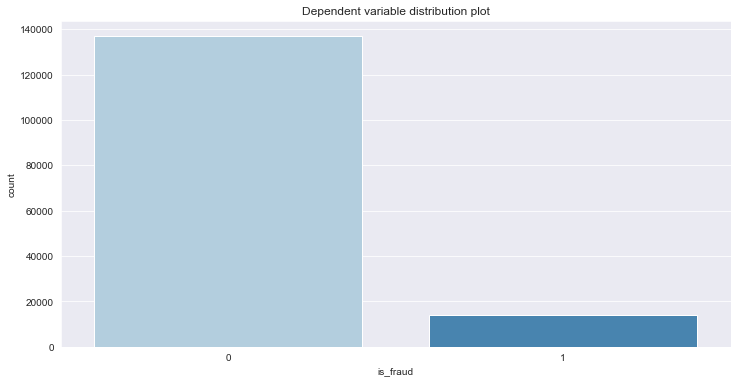

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(df['is_fraud'],palette='Blues')
plt.title('Dependent variable distribution plot')
plt.xlabel('is_fraud')

df['is_fraud'].value_counts()

#### Insight:
Observamos que el data set se encuentra altamente desbalanceado, las observaciones de fraude representan aproximadamente un 10% del total.

#### Cuadro de correlación

<AxesSubplot:>

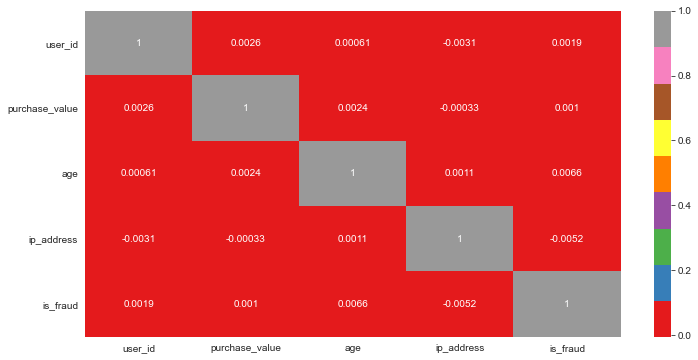

In [11]:
cor = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

La correlación entre variables es prácticamente nula

#### Chequeo si hay observaciones nulas

In [12]:
k= pd.DataFrame()
k['df']= df.isnull().sum()
k.T

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
df,0,0,0,0,0,0,0,0,0,0,0


No hay onbservaciones nulas o NaNs


### Generamos nuevas variables que nos serán de utilidad más adelante

#### Variable objetivo en formato texto
##### Fraud

In [13]:
# Lista de condiciones
conditions = [
    (df['is_fraud'] <= 0),
    (df['is_fraud'] > 0)
    ]

# Valores para cada condicion
values = ['No', 'Yes']

# Nueva columna basada en las condiciones
df['Fraud'] = np.select(conditions, values)

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No


#### Cantidad de usuarios  conectados en un mismo dispositivo
##### Q users by device

In [14]:
df2 = df.groupby('device_id').user_id.nunique().reset_index(name="Q users by device")
df2.nlargest(10,'Q users by device')

,device_id,Q users by device
14100,CQTUVBYIWWWBC,20
24607,EQYVNEGOFLAWK,20
46203,ITUMJCKWEYNDD,20
54521,KIPFSCNUGOLDP,20
69916,NGQCKIADMZORL,20
136873,ZUSVMDEZRBDTX,20
9984,BWSMVSLCJXMCM,19
11278,CDFXVYHOIHPYP,19
22511,EGLGSEGYPMMAM,19
43477,IGKYVZDBEGALB,19


#### Cantidad de usuarios  conectados en una misma dirección de IP
##### Q users by IP

In [15]:
df3 = df.groupby('ip_address').user_id.nunique().reset_index(name="Q users by IP")
df3.nlargest(10,'Q users by IP')

,ip_address,Q users by IP
19944,5.760609e+08,20
50543,1.502818e+09,20
68161,2.050964e+09,20
128962,3.874758e+09,20
11967,3.484934e+08,19
59463,1.797069e+09,19
59600,1.800550e+09,19
86465,2.586669e+09,19
97533,2.937899e+09,19
101587,3.058785e+09,19


#### Insight: 
Se observa una clusterización similar en device y en IPs por numero de usuarios

#### Agregamos la canitdad de users por device y por IP como nueva variable al data set

In [16]:
df = pd.merge(df,df3,on='ip_address',how='left')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1


In [17]:
df = pd.merge(df,df2,on='device_id',how='left')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1,1
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1,1


#### Generamos una nueva variable que segmenta en grupos la concentración de usuarios en un dispositivo
###### Q_users_device
Menor_2: 2 personas conectadas o menos

Entre3_Y_9: entre 3 y 9 personas conectadas

Entre10_Y_15: entre 10 y 15 personas conectadas

Mayor_15: 16 personas conectadas o más

In [18]:
# Lista de condiciones
conditions = [
    (df['Q users by device'] <= 2),
    (df['Q users by device'] > 2) & (df['Q users by device'] <= 9),
    (df['Q users by device'] > 9) & (df['Q users by device'] <= 15),
    (df['Q users by device'] > 15)
    ]

# Valores para coada condicion
values = ['Menor_2', 'Entre3_Y_9', 'Entre10_Y_15', 'Mayor_15']

# Nueva columna basada en las condiciones
df['Q_users_device'] = np.select(conditions, values)

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device,Q_users_device
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1,1,Menor_2
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1,1,Menor_2
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12,Entre10_Y_15
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1,1,Menor_2
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1,1,Menor_2


#### Generamos una nueva variable que segmenta en grupos la concentración de usuarios en una misma dirección de IP
###### Q_users_IP
Menor_2: 2 personas conectadas o menos

Entre3_Y_9: entre 3 y 9 personas conectadas

Entre10_Y_15: entre 10 y 15 personas conectadas

Mayor_15: 16 personas conectadas o más

In [19]:
# Lista de condiciones
conditions = [
    (df['Q users by IP'] <= 2),
    (df['Q users by IP'] > 2) & (df['Q users by IP'] <= 9),
    (df['Q users by IP'] > 9) & (df['Q users by IP'] <= 15),
    (df['Q users by IP'] > 15)
    ]

# Valores para coada condicion
values = ['Menor_2', 'Entre2_Y_9', 'Entre10_Y_15', 'Mayor_15']

# Nueva columna basada en las condiciones
df['Q_users_IP'] = np.select(conditions, values)

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device,Q_users_device,Q_users_IP
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1,1,Menor_2,Menor_2
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1,1,Menor_2,Menor_2
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12,Entre10_Y_15,Entre10_Y_15
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1,1,Menor_2,Menor_2
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1,1,Menor_2,Menor_2


#### Extraemos la fecha y hora de cada transacción por separado
##### signup_date

Fecha de la conexión al dispositivo

In [20]:
df['signup_date'] = [x[:10] for x in df['signup_time']]
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device,Q_users_device,Q_users_IP,signup_date
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1,1,Menor_2,Menor_2,2015-02-24
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1,1,Menor_2,Menor_2,2015-06-07
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12,Entre10_Y_15,Entre10_Y_15,2015-01-01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1,1,Menor_2,Menor_2,2015-04-28
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1,1,Menor_2,Menor_2,2015-07-21


##### purchase_date

Fecha de la compra

In [21]:
df['purchase_date'] = [x[:10] for x in df['purchase_time']]
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device,Q_users_device,Q_users_IP,signup_date,purchase_date
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1,1,Menor_2,Menor_2,2015-02-24,2015-04-18
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1,1,Menor_2,Menor_2,2015-06-07,2015-06-08
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12,Entre10_Y_15,Entre10_Y_15,2015-01-01,2015-01-01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1,1,Menor_2,Menor_2,2015-04-28,2015-05-04
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1,1,Menor_2,Menor_2,2015-07-21,2015-09-09


In [22]:
df['signup_time'] = [x[11:] for x in df['signup_time']]
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device,Q_users_device,Q_users_IP,signup_date,purchase_date
0,22058,22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1,1,Menor_2,Menor_2,2015-02-24,2015-04-18
1,333320,20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1,1,Menor_2,Menor_2,2015-06-07,2015-06-08
2,1359,18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12,Entre10_Y_15,Entre10_Y_15,2015-01-01,2015-01-01
3,150084,21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1,1,Menor_2,Menor_2,2015-04-28,2015-05-04
4,221365,7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1,1,Menor_2,Menor_2,2015-07-21,2015-09-09


In [23]:
df['purchase_time'] = [x[11:] for x in df['purchase_time']]
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device,Q_users_device,Q_users_IP,signup_date,purchase_date
0,22058,22:55:49,2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,No,1,1,Menor_2,Menor_2,2015-02-24,2015-04-18
1,333320,20:39:50,1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,No,1,1,Menor_2,Menor_2,2015-06-07,2015-06-08
2,1359,18:52:44,18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12,Entre10_Y_15,Entre10_Y_15,2015-01-01,2015-01-01
3,150084,21:13:25,13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,No,1,1,Menor_2,Menor_2,2015-04-28,2015-05-04
4,221365,7:09:52,18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,No,1,1,Menor_2,Menor_2,2015-07-21,2015-09-09


In [24]:
# Cantidad de compras por día y usuario 

df4 = df.groupby(["user_id", "purchase_date"]).user_id.count().reset_index(name="Q purchase by date")
df4.nlargest(10,'Q purchase by date')

,user_id,purchase_date,Q purchase by date
0,2,2015-02-21,1
1,4,2015-09-26,1
2,8,2015-08-13,1
3,9,2015-05-20,1
4,12,2015-03-04,1
5,16,2015-03-12,1
6,18,2015-10-23,1
7,26,2015-03-21,1
8,33,2015-10-28,1
9,39,2015-01-08,1


In [25]:
# Proporción de fraude según la acumulación de users en una misma IP

df_IP = df.groupby(['Q_users_IP', 'Fraud']).size().reset_index(name='Count')
df_IP

,Q_users_IP,Fraud,Count
0,Entre10_Y_15,No,420
1,Entre10_Y_15,Yes,4860
2,Entre2_Y_9,No,239
3,Entre2_Y_9,Yes,1684
4,Mayor_15,No,66
5,Mayor_15,Yes,1089
6,Menor_2,No,136236
7,Menor_2,Yes,6518


In [26]:
# Sumo las de observaciones y lo uso como divisor de la cantidad de cada grupo para obtener los porcentajes

df_IP['Total'] = df_IP['Count'].sum()
df_IP['Proportion'] = df_IP['Count']/df_IP['Total']
df_IP['Check'] = df_IP['Proportion'].sum()
df_IP['Percentage'] = round(df_IP['Proportion']*100,2)
df_IP

,Q_users_IP,Fraud,Count,Total,Proportion,Check,Percentage
0,Entre10_Y_15,No,420,151112,0.002779,1.0,0.28
1,Entre10_Y_15,Yes,4860,151112,0.032162,1.0,3.22
2,Entre2_Y_9,No,239,151112,0.001582,1.0,0.16
3,Entre2_Y_9,Yes,1684,151112,0.011144,1.0,1.11
4,Mayor_15,No,66,151112,0.000437,1.0,0.04
5,Mayor_15,Yes,1089,151112,0.007207,1.0,0.72
6,Menor_2,No,136236,151112,0.901556,1.0,90.16
7,Menor_2,Yes,6518,151112,0.043134,1.0,4.31


In [27]:
# Proporción de fraude según la acumulación de users en un mismo device

df_device = df.groupby(['Q_users_device', 'Fraud']).size().reset_index(name='Count')
df_device

,Q_users_device,Fraud,Count
0,Entre10_Y_15,No,453
1,Entre10_Y_15,Yes,4903
2,Entre3_Y_9,No,449
3,Entre3_Y_9,Yes,1680
4,Mayor_15,No,74
5,Mayor_15,Yes,1118
6,Menor_2,No,135985
7,Menor_2,Yes,6450


In [28]:
# Sumo las de observaciones y lo uso como divisor de la cantidad de cada grupo para obtener los porcentajes

df_device['Total'] = df_device['Count'].sum()
df_device['Proportion'] = df_device['Count']/df_device['Total']
df_device['Check'] = df_device['Proportion'].sum()
df_device['Percentage'] = round(df_device['Proportion']*100,2)
df_device

,Q_users_device,Fraud,Count,Total,Proportion,Check,Percentage
0,Entre10_Y_15,No,453,151112,0.002998,1.0,0.30
1,Entre10_Y_15,Yes,4903,151112,0.032446,1.0,3.24
2,Entre3_Y_9,No,449,151112,0.002971,1.0,0.30
3,Entre3_Y_9,Yes,1680,151112,0.011118,1.0,1.11
4,Mayor_15,No,74,151112,0.000490,1.0,0.05
5,Mayor_15,Yes,1118,151112,0.007398,1.0,0.74
6,Menor_2,No,135985,151112,0.899895,1.0,89.99
7,Menor_2,Yes,6450,151112,0.042684,1.0,4.27


### Generamos sub data set con las tx de fraude

In [29]:
df_fraud = df.loc[df['is_fraud'] == 1]
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,Fraud,Q users by IP,Q users by device,Q_users_device,Q_users_IP,signup_date,purchase_date
2,1359,18:52:44,18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,Yes,12,12,Entre10_Y_15,Entre10_Y_15,2015-01-01,2015-01-01
24,171711,1:51:15,1:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1,Yes,8,8,Entre3_Y_9,Entre2_Y_9,2015-01-11,2015-01-11
25,59780,22:32:33,1:13:43,31,WUMOBGUCBOXPO,SEO,FireFox,M,36,1.752167e+09,1,Yes,1,2,Menor_2,Menor_2,2015-01-04,2015-01-16
29,151705,3:44:53,3:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,Yes,11,11,Entre10_Y_15,Entre10_Y_15,2015-01-07,2015-01-07
59,345865,5:59:23,8:09:10,36,FKQPZUELCRKBL,SEO,IE,M,30,2.740590e+09,1,Yes,1,1,Menor_2,Menor_2,2015-02-01,2015-02-20


In [30]:
df_fraud.shape

(14151, 18)

#### Análisis univariado

El objetivo es entender la distribución de cada variable para determinar si se incluirá en el modelo

*Edad*

<AxesSubplot:xlabel='age', ylabel='Density'>

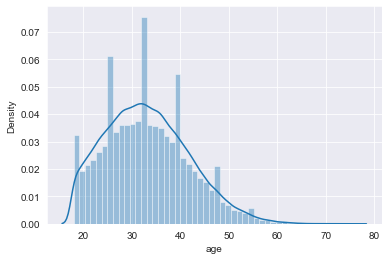

In [31]:
sns.distplot(df.age)

La edad matoritaria se encuentra entre los 25 y 40 años

*Importe de compra*

<AxesSubplot:xlabel='purchase_value', ylabel='Density'>

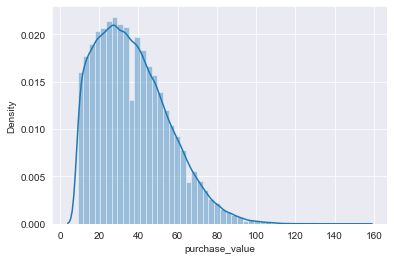

In [32]:
sns.distplot(df.purchase_value)

No hay importes fuera de la distribución

*Sexo*

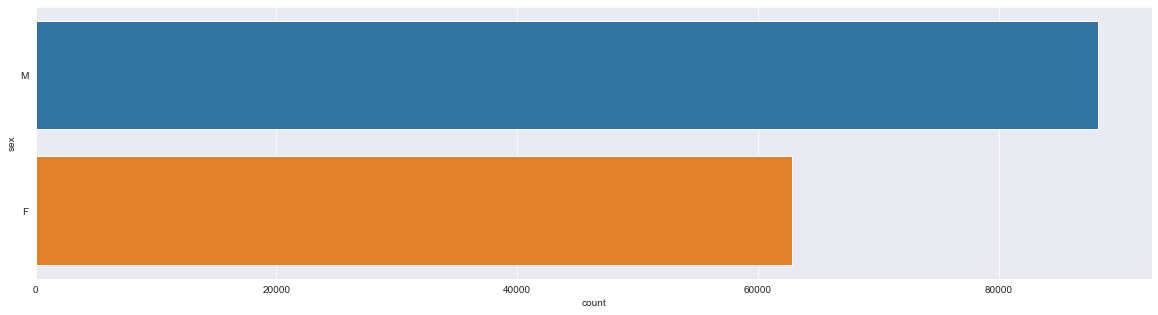

In [33]:
plt.figure(figsize=(20D, 5))
sns.countplot(y="sex", data=df);

In [34]:
# ¿Cómo se ve el fraude de acuerdo al sexo?
# Posible con características binarias

# Subset data dataframes
df_bin = pd.DataFrame()
df_bin['is_fraud'] = df['is_fraud']
df_bin['sex'] = df['sex']
df_bin['sex'] = np.where(df_bin['sex'] == 'F', 1, 0) # change sex to 0 for male and 1 for female

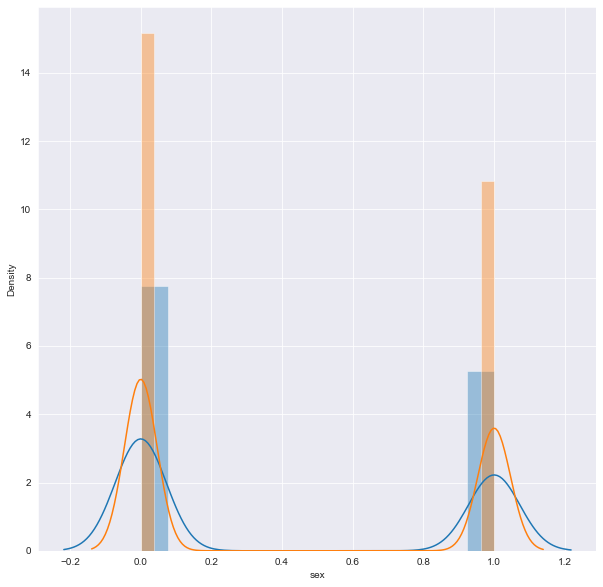

In [35]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['is_fraud'] == 1]['sex'], kde_kws={'label': 'Es fraude'});
sns.distplot(df_bin.loc[df_bin['is_fraud'] == 0]['sex'], kde_kws={'label': 'No es fraude'});

Las transacciones con fraude, fueron más hechas por hombres

*Browser*

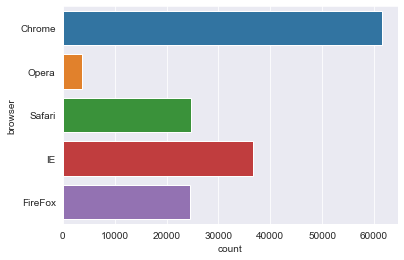

In [36]:
sns.countplot(y="browser", data=df);

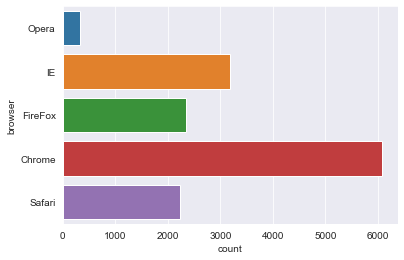

In [37]:
sns.countplot(y="browser", data=df_fraud);

Vemos que la distribución entre las transacciones con fraude y las totales no es afectado por el navegador utilizado

*Fuente*

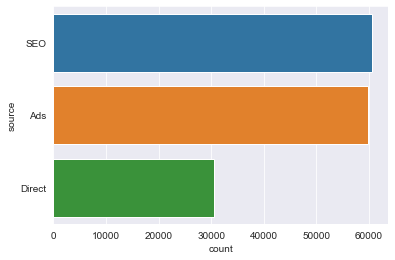

In [38]:
sns.countplot(y="source", data=df);

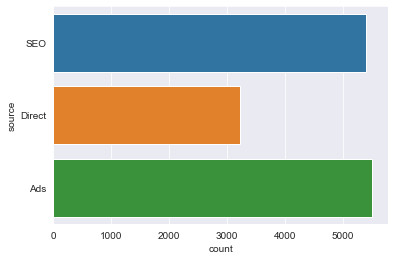

In [39]:
sns.countplot(y="source", data=df_fraud);

Vemos que la distribución entre las transacciones con fraude y las totales no es afectado por la fuente utilizada

*Q users by device*

In [40]:
df_bin['Q users by device'] = pd.cut(df['Q users by device'], bins=5) # discretised 
df_bin['Q users by device'].value_counts()

(0.981, 4.8]    142721
(8.6, 12.4]       3813
(12.4, 16.2]      2821
(4.8, 8.6]        1141
(16.2, 20.0]       616
Name: Q users by device, dtype: int64

In [41]:
df_bin_fraud = df_bin.loc[df['is_fraud'] == 1]
df_bin_fraud['Q users by device'].value_counts()

(0.981, 4.8]    6526
(8.6, 12.4]     3452
(12.4, 16.2]    2613
(4.8, 8.6]       980
(16.2, 20.0]     580
Name: Q users by device, dtype: int64

In [42]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Fraude"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "No es fraude"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Fraude"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "No es fraude"});

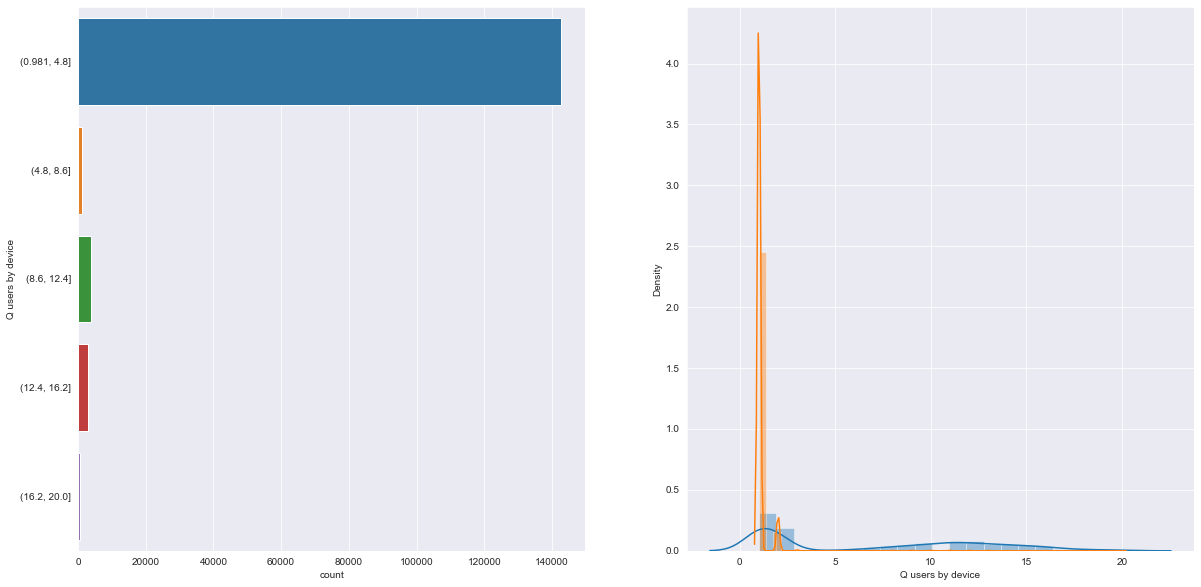

In [43]:
# Contador de users en un mismo device y su relación con el fraude
plot_count_dist(data=df,
                bin_df=df_bin,
                label_column='is_fraud', 
                target_column='Q users by device', 
                figsize=(20,10), 
                use_bin_df=True)

#### Análisis bivariado

Text(0, 0.5, 'Cantidad de tx de fraude')

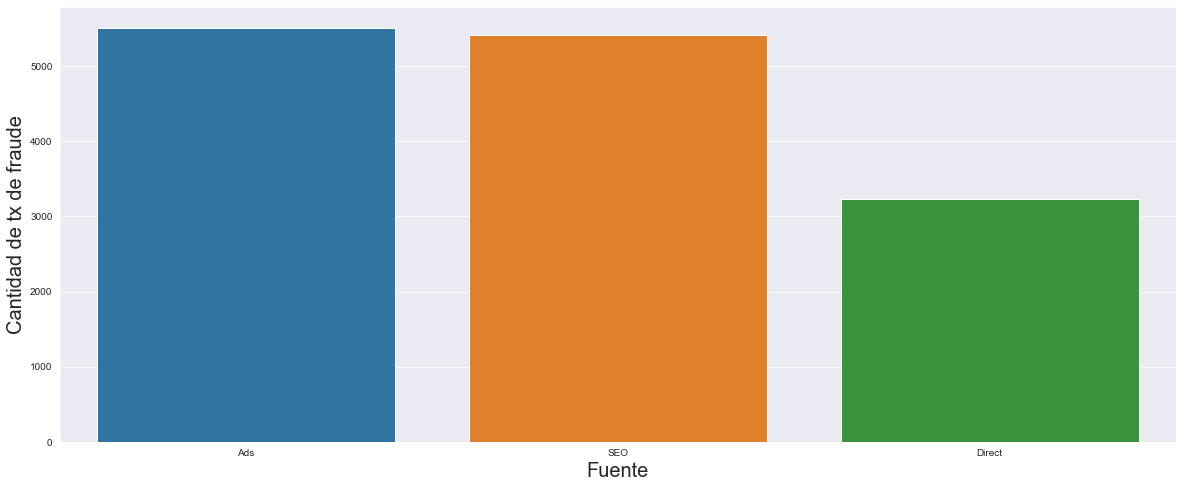

In [45]:
#Relación entre el motor de búsqueda y las transacciones de fraude

cat = df_fraud[["source", "is_fraud"]].groupby(['source'], as_index=False).sum().sort_values(by='is_fraud', ascending=False)

plt.figure(figsize=(20,8))

p = sns.barplot(x='source', y='is_fraud', data=cat)
p.set_xlabel("Fuente", fontsize = 20)
p.set_ylabel("Cantidad de tx de fraude", fontsize = 20)

#### Análisis multivariado

##### Relación entre la concentración de usuarios por device y por IP, con el fraude

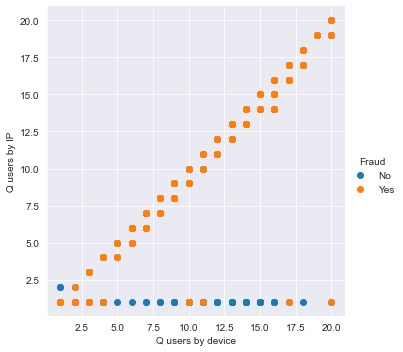

In [46]:
sns.FacetGrid(df,hue = 'Fraud' , size = 5).map(plt.scatter,'Q users by device','Q users by IP').add_legend();
plt.show()

In [47]:
df_fraud.groupby(['user_id']).size().reset_index(name='counts')

,user_id,counts
0,39,1
1,44,1
2,100,1
3,101,1
4,123,1
...,...,...
14146,399916,1
14147,399944,1
14148,399974,1
14149,399979,1


Cada user_id solo realizó una compra

#### Prueba de algoritmos de clasificación

In [48]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            151112 non-null  int64  
 1   signup_time        151112 non-null  object 
 2   purchase_time      151112 non-null  object 
 3   purchase_value     151112 non-null  int64  
 4   device_id          151112 non-null  object 
 5   source             151112 non-null  object 
 6   browser            151112 non-null  object 
 7   sex                151112 non-null  object 
 8   age                151112 non-null  int64  
 9   ip_address         151112 non-null  float64
 10  is_fraud           151112 non-null  int64  
 11  Fraud              151112 non-null  object 
 12  Q users by IP      151112 non-null  int64  
 13  Q users by device  151112 non-null  int64  
 14  Q_users_device     151112 non-null  object 
 15  Q_users_IP         151112 non-null  object 
 16  si

#### Árbol de Decisión de Clasificación

In [49]:
df_subset = df[["browser", "sex", "source", "Q users by device", "Q users by IP", "Q_users_device", "Q_users_IP", 
                "Fraud"]]
df_subset

,browser,sex,source,Q users by device,Q users by IP,Q_users_device,Q_users_IP,Fraud
0,Chrome,M,SEO,1,1,Menor_2,Menor_2,No
1,Chrome,F,Ads,1,1,Menor_2,Menor_2,No
2,Opera,M,SEO,12,12,Entre10_Y_15,Entre10_Y_15,Yes
3,Safari,M,SEO,1,1,Menor_2,Menor_2,No
4,Safari,M,Ads,1,1,Menor_2,Menor_2,No
...,...,...,...,...,...,...,...,...
151107,Chrome,M,SEO,2,1,Menor_2,Menor_2,Yes
151108,Safari,M,SEO,1,1,Menor_2,Menor_2,No
151109,IE,F,SEO,1,1,Menor_2,Menor_2,No
151110,Chrome,M,SEO,2,1,Menor_2,Menor_2,No


In [50]:
df_dummy = pd.get_dummies(df_subset, dummy_na=False, sparse=False, drop_first=True)
df_dummy

,Q users by device,Q users by IP,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,source_Direct,source_SEO,Q_users_device_Entre3_Y_9,Q_users_device_Mayor_15,Q_users_device_Menor_2,Q_users_IP_Entre2_Y_9,Q_users_IP_Mayor_15,Q_users_IP_Menor_2,Fraud_Yes
0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,12,12,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0
4,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,2,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1
151108,1,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0
151109,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
151110,2,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [51]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('Fraud_Yes', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Fraud_Yes #Defino el Target

In [52]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [53]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [54]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [55]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9517101854828036
% de aciertos sobre el set de evaluación: 0.952905104336701


#### Insight

Se observa una buena performance del modelo.

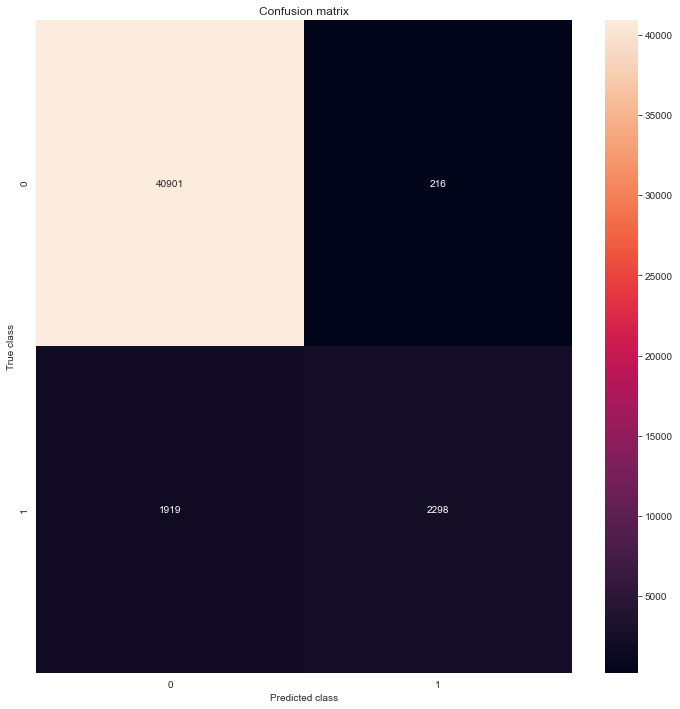

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41117
           1       0.91      0.54      0.68      4217

    accuracy                           0.95     45334
   macro avg       0.93      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334



In [56]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, y_test_pred):
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_test_pred))
 
mostrar_resultados(y_test, y_test_pred)

###### Insight 
Se observa una buena asignación de categorías, con muy poca perturbación de los falsos positivos. 

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
#Separamos los datos de entrada de la salida
x = df_dummy.drop('Fraud_Yes', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Fraud_Yes #Defino el Target

#Separamos en train y test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size=0.30, random_state=11)

In [59]:
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [60]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [61]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred )}")

Accuracy of the classifier is: 0.9120968809282216


In [62]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.5226796929518492


In [63]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

Recall Score of the classifier is: 0.705771495877503


In [64]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.6005813370752731


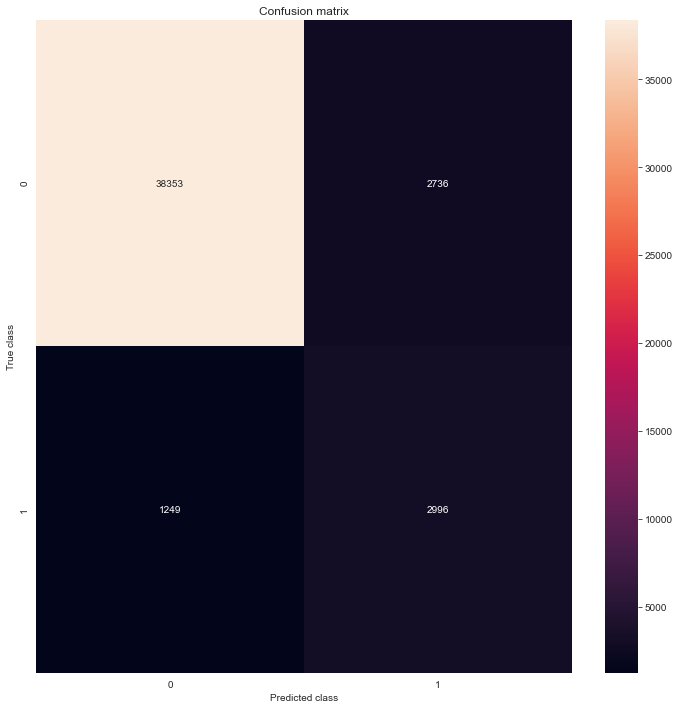

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     41089
           1       0.52      0.71      0.60      4245

    accuracy                           0.91     45334
   macro avg       0.75      0.82      0.78     45334
weighted avg       0.93      0.91      0.92     45334



In [65]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, y_test_pred):
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_test_pred))
 
mostrar_resultados(y_test, y_test_pred)

#### Comparación de modelos


Modelo            || Precisión |   Recall  |    F1     | Accuracy
------------------||-----------|-----------|-----------|-----------
Árbol de decisión ||   0,91    |   0,54    |    0,68   |    0,95   
Random Forest     ||   0,52    |   0,70    |    0,60   |    0,91   


Se observa una peor asignación de las categorías en el modelo Random Forest


### Regresión lógistica

In [66]:
#Separamos los datos de entrada de la salida
x = df_dummy.drop('Fraud_Yes', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Fraud_Yes #Defino el Target

In [67]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 

In [68]:
y=y.astype('int')

In [69]:
# Entrenamos un modelo de regresión logística

# Importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(x,y)

LogisticRegression()

In [70]:
# Hacemos la predicción para 10 valores aleatorios
X_nuevo = x.sample(n=30)
X_nuevo

,Q users by device,Q users by IP,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,source_Direct,source_SEO,Q_users_device_Entre3_Y_9,Q_users_device_Mayor_15,Q_users_device_Menor_2,Q_users_IP_Entre2_Y_9,Q_users_IP_Mayor_15,Q_users_IP_Menor_2
125415,1,1,1,0,0,0,1,1,0,0,0,1,0,0,1
35975,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1
127540,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1
54524,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1
123815,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1
70903,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1
67313,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1
44503,2,1,1,0,0,0,1,0,1,0,0,1,0,0,1
81159,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1
65829,2,1,0,1,0,0,1,0,0,0,0,1,0,0,1


In [71]:
# Usa el modelo entrenado para obtener las predicciones con datos nuevos

prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [72]:
# Obtenemos las probabilidades de la predicción
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
print(probabilidades_prediccion)

[[0.95963855 0.04036145]
 [0.96842749 0.03157251]
 [0.95968417 0.04031583]
 [0.96843809 0.03156191]
 [0.96749551 0.03250449]
 [0.96805774 0.03194226]
 [0.96805774 0.03194226]
 [0.82584158 0.17415842]
 [0.96744751 0.03255249]
 [0.82147656 0.17852344]
 [0.9684741  0.0315259 ]
 [0.96775068 0.03224932]
 [0.95974315 0.04025685]
 [0.96843809 0.03156191]
 [0.96805774 0.03194226]
 [0.0665648  0.9334352 ]
 [0.95969759 0.04030241]
 [0.96706667 0.03293333]
 [0.81836452 0.18163548]
 [0.81982913 0.18017087]
 [0.95963855 0.04036145]
 [0.96805774 0.03194226]
 [0.96741037 0.03258963]
 [0.96706667 0.03293333]
 [0.96839143 0.03160857]
 [0.96710419 0.03289581]
 [0.96843809 0.03156191]
 [0.96744751 0.03255249]
 [0.9684741  0.0315259 ]
 [0.96706667 0.03293333]]


#### Insight

En este caso 1 de los 10 casos de la muestra sería fraude, lo que tiene sentido ya que en el universo total del dataset el 10% es fraude.

In [73]:
# Porcentaje de observaciones de fraude
df['is_fraud'].values.sum() / df.user_id.count() * 100

9.364577267192546

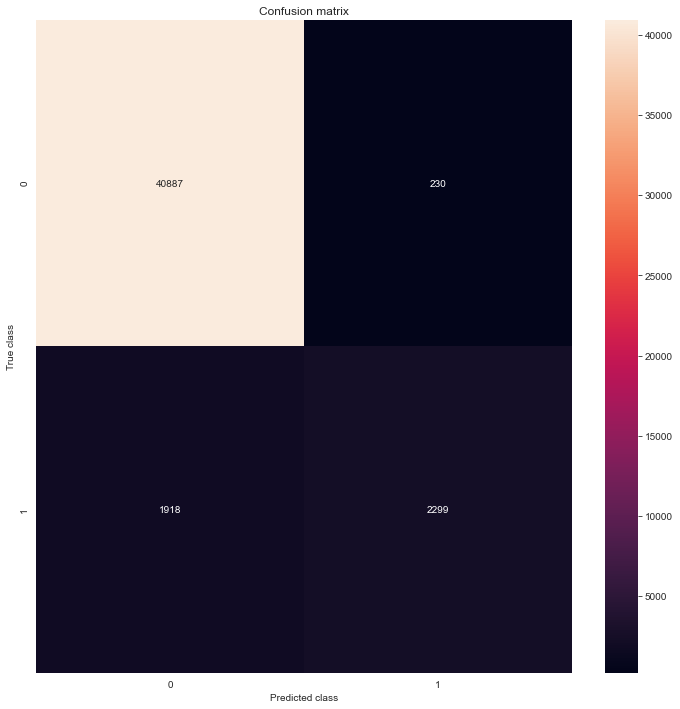

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41117
           1       0.91      0.55      0.68      4217

    accuracy                           0.95     45334
   macro avg       0.93      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334



In [74]:
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)

#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

#### Comparación de modelos


Modelo              || Precisión |   Recall  |    F1     | Accuracy
--------------------||-----------|-----------|-----------|-----------
Árbol de decisión   ||   0,91    |   0,54    |    0,68   |    0,95   
Random Forest       ||   0,52    |   0,70    |    0,60   |    0,91 
Regresión Lógistica ||   0,91    |   0,55    |    0,68   |    0,95 


En la regresión logística se observa una performance muy similar a la del árbol, siendo apenas superior en el recall.

### Estrategia: Subsampling en la clase mayoritaria
El objetivo es balancear las 2 clases (fraude y no fraude) para obtener una muestra del data set con mismas cantidad de observaciones y así evitar que los resultados se inclinen por la clase mayoritaria.

In [117]:
# Separamos en X e y como así también en Train y Test
X = df_dummy.drop('Fraud_Yes', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Fraud_Yes #Defino el Target

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

In [118]:
us = NearMiss(sampling_strategy=0.5, n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 95816, 1: 9962})
Distribution after resampling Counter({0: 19924, 1: 9962})


0    136961
1     14151
Name: is_fraud, dtype: int64

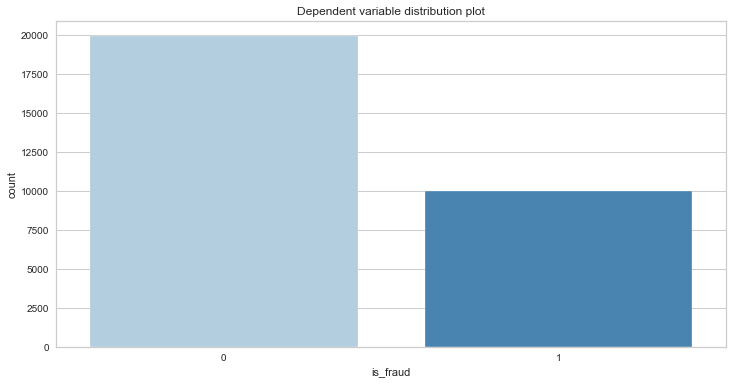

In [121]:
plt.figure(figsize=(12,6))
sns.countplot(y_train_res,palette='Blues')
plt.title('Dependent variable distribution plot')
plt.xlabel('is_fraud')

df['is_fraud'].value_counts()

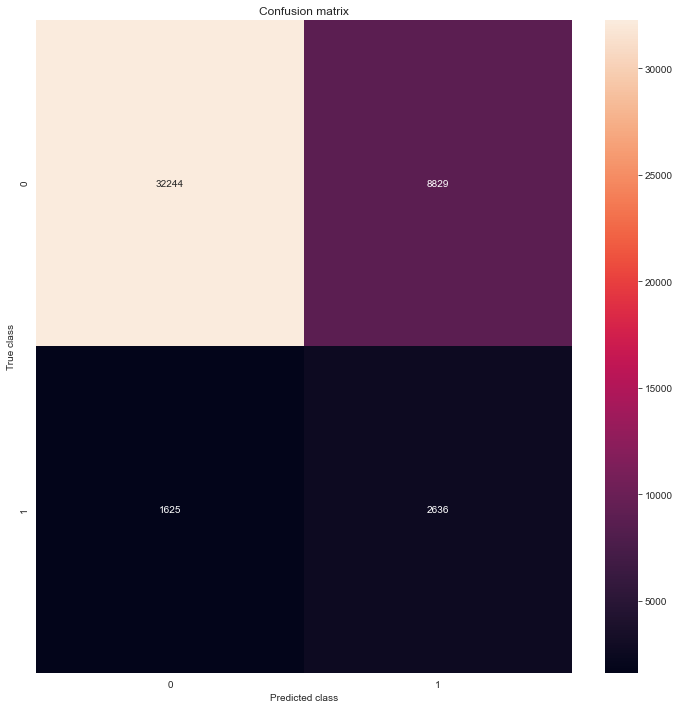

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     41073
           1       0.23      0.62      0.34      4261

    accuracy                           0.77     45334
   macro avg       0.59      0.70      0.60     45334
weighted avg       0.88      0.77      0.81     45334



In [77]:
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

#### Conclusiones

Al ser una clase desbalanceada nos centraremos en la precisión, recall y F1 del modelo de la clase menos representada, es decir la 1 que son las transacciones de fraude


Modelo                             || Precision |   Recall  |    F1     | Accuracy
-----------------------------------||-----------|-----------|-----------|-----------
Árbol de decisión                  ||   0,91    |   0,54    |    0,68   |    0,95   
Random Forest                      ||   0,52    |   0,70    |    0,60   |    0,91 
Regresión Lógistica                ||   0,91    |   0,55    |    0,68   |    0,95 
Regresión Lógistica con subsamping ||   0,23    |   0,62    |    0,34   |    0,77 


Al ajustar las clases la performance el modelo logra capturar mayor fraude pero a la vez un se genera mayor frición con los usuarios que no son fraude y fueron clasificados como tal. Por lo que continuaremos trabajando con el modelo de regresión lógistica para probar si es posible mejorarlo aún más realizando los ajustes necesarios.

## Validación del modelo

#### Índice de Silhoutte
Métrica para determinar si el registro va a estar bien asignado en un determinado cluster.
Va de -1 (lo peor) a 1 (lo mejor).

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from warnings import filterwarnings
filterwarnings('ignore')

In [79]:
# Estandarizar los datos
X_std = StandardScaler().fit_transform(df_dummy)

In [80]:
# Aplicación de Kmeans
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_std)

KMeans(n_clusters=2, random_state=42)

In [81]:
score = silhouette_score(X_std, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.681


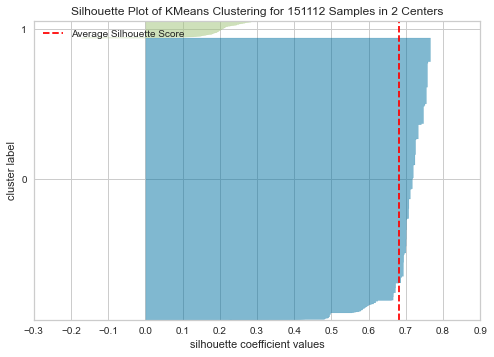

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 151112 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Con un índice de Silhoutter de 0,68 podemos decir que se asignan correctamente los grupos entre fraude y no fraude

## Optimización del modelo

#### Gridsearch CV
No es posible usar este algoritmo debido a la cantidad de hiperparametros

#### Random Search

In [85]:
#Separamos los datos de entrada de la salida
x = df_dummy.drop('Fraud_Yes', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Fraud_Yes #Defino el Target

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [86]:
#Creamos nuestro objeto KNN
knn = KNeighborsClassifier()

In [87]:
# Grilla para Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

#Aplicamos la grilla al modelo
model = RandomizedSearchCV(knn, param_dist,n_iter=15, random_state=0, cv=5)

In [88]:
#Entrenamos KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=15,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002478A50E970>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002478A904490>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [89]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 4, 'n_neighbors': 8, 'weights': 'uniform'}
Mejor Score: 0.9506944024482602



In [90]:
#Analizamos qué obtuvimos
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.263390,0.008142,20.285064,2.367160,auto,6,1,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.945471,0.944545,0.943089,0.943486,0.944190,0.944156,0.000833,13
1,0.277215,0.004856,25.264676,2.777731,kd_tree,4,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_ne...",0.952310,0.951162,0.949618,0.949795,0.949749,0.950527,0.001053,5
2,0.266540,0.005361,20.729119,2.314068,kd_tree,6,3,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_ne...",0.949971,0.948251,0.946177,0.946707,0.948160,0.947853,0.001331,11
3,0.253445,0.002969,20.809252,2.298698,kd_tree,7,9,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.952486,0.951207,0.949751,0.949795,0.950101,0.950668,0.001051,3
4,0.298590,0.005976,33.024982,3.737291,auto,2,7,distance,"{'algorithm': 'auto', 'leaf_size': 2, 'n_neigh...",0.951604,0.951162,0.949574,0.949795,0.949749,0.950377,0.000837,10
5,0.257401,0.004795,20.240296,2.367666,kd_tree,9,2,distance,"{'algorithm': 'kd_tree', 'leaf_size': 9, 'n_ne...",0.943751,0.943045,0.943354,0.942868,0.941984,0.943000,0.000590,15
6,0.257139,0.003936,20.286246,2.353252,kd_tree,9,5,distance,"{'algorithm': 'kd_tree', 'leaf_size': 9, 'n_ne...",0.951207,0.951207,0.949530,0.950236,0.950146,0.950465,0.000652,7
7,0.282950,0.008751,25.577092,2.975889,auto,4,6,uniform,"{'algorithm': 'auto', 'leaf_size': 4, 'n_neigh...",0.951560,0.951339,0.949530,0.950192,0.950499,0.950624,0.000746,4
8,0.324575,0.002251,45.908842,4.525485,kd_tree,1,3,distance,"{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_ne...",0.949795,0.948118,0.946133,0.946751,0.947851,0.947730,0.001260,12
9,0.294226,0.003264,33.451039,4.016010,auto,2,4,distance,"{'algorithm': 'auto', 'leaf_size': 2, 'n_neigh...",0.949795,0.951604,0.950589,0.950192,0.949925,0.950421,0.000651,9


In [91]:
#Prediccion
prediction = model.predict(X_test)

In [92]:
#Accuracy
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.950076764254328


In [93]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, prediction)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95601885 0.85971686]
recall: [0.99044279 0.56244738]
fscore: [0.97292642 0.68001357]
support: [34215  3563]


In [94]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[33888   327]
 [ 1559  2004]]


#### Insight

Se observa una buena asinación del fraude. Sin embargo los resultados obtenidos con la regresión lógistica logran menor fricción entre los falsos positivos.

## Estrategias de boosting

### Light GBM

In [95]:
# Separamos en X e y como así también en Train y Test
X = df_dummy.drop('Fraud_Yes', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Fraud_Yes #Defino el Target

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [96]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [97]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9542


In [98]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95645576 0.91533546]
recall: [0.99485149 0.55135915]
fscore: [0.97527587 0.68818496]
support: [41177  4157]


In [99]:
cm = confusion_matrix(y_test,y_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[40965   212]
 [ 1865  2292]]


Con este modelo se logra capturar ligeramente un mayor número de fraude y disminuir los falsos positivos.

### XGBoost sobre clasificación

In [101]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [102]:
# Separamos en X e y como así también en Train y Test
X = df_dummy.drop('Fraud_Yes', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Fraud_Yes #Defino el Target

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [103]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

In [104]:
#Entrenamos el modelo
clf_xgb.fit(X_train,y_train) 

[13:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [105]:
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

In [106]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9525266980453143
% de aciertos sobre el set de evaluación: 0.9503358369453727


In [107]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, y_test_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95244603 0.91464138]
recall: [0.99472971 0.53206897]
fscore: [0.97312877 0.67277087]
support: [27323  2900]


In [108]:
cm = confusion_matrix(y_test,y_test_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[27179   144]
 [ 1357  1543]]


Insight: 
Se observa una relación similar a los modelos anteriores para el número de observaciones en test. 
Esto es poca fricción para los falsos positivos. Y una se logra capturar poco más de la mitad del fraude total.

## Conclusiones
Se recomienda utilizar el modelo de Light GBM que logra capturar el 53% del fraude.
Se logran buenos resultados en cuanto a la precisión y a la exactitud. Solamente un 0,5% de los usuarios no fraudulentos son mal clasificados por lo que la mala experiencia utilizando el sitio web es practicamente nula.